<a href="https://colab.research.google.com/github/KharchenkoAnastasia/Airbus-Ship-Detection/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [16]:
!kaggle competitions download -c airbus-ship-detection

100% 28.6G/28.6G [05:58<00:00, 104MB/s]
100% 28.6G/28.6G [05:59<00:00, 85.5MB/s]


In [17]:
!unzip -q airbus-ship-detection -d airbus-ship-detection

00e5fb033.jpg
0da346d32.jpg
0b7359c38.jpg
0efa4a040.jpg
1b5fd69bc.jpg


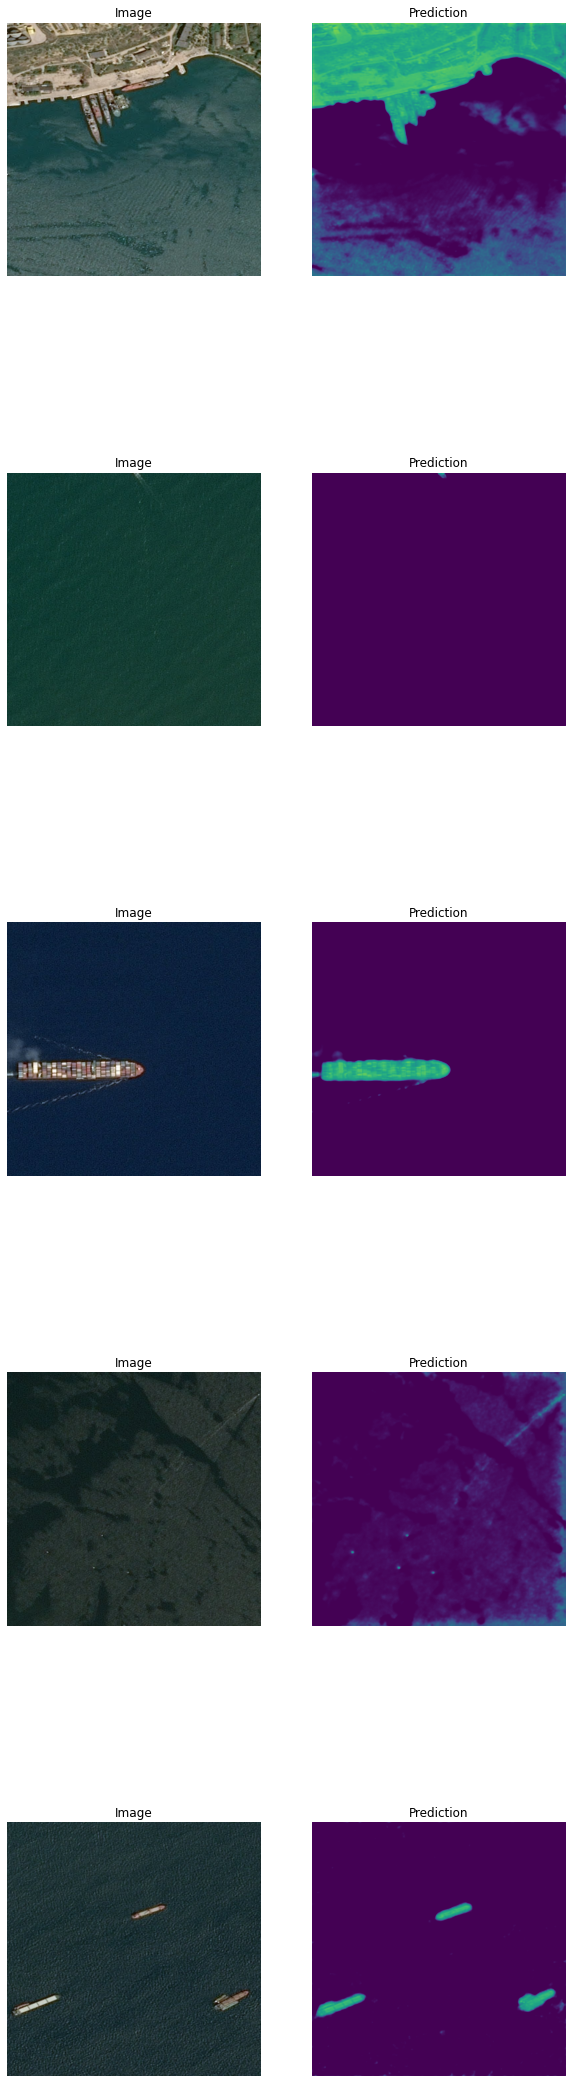

In [18]:

TEST_DIR = 'airbus-ship-detection/test_v2/'
from skimage.io import imread
import tensorflow as tf
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import os
import numpy as np
from skimage.io import imread
from tensorflow.keras.losses import binary_crossentropy
import tensorflow.keras.backend as K


def dice_coeff(target, pred):
  # target__==target
  smooth = 1.0
  intersection = K.sum(target * pred, axis=[1,2,3])
  union = K.sum(target, axis=[1,2,3]) + K.sum(pred, axis=[1,2,3])
  return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)
  # return ((2*((pred*target).sum()))+smooth) / (pred.sum()+target.sum()+smooth)

def loss(target, pred):
  bce = binary_crossentropy(target, pred)
  dice_loss = 1-dice_coeff(target, pred)
  return bce-tf.math.log(1-dice_loss)

unet_model = keras.models.load_model('unet_model.h5',custom_objects={'loss': loss})

fig, m_axs = plt.subplots(5, 2, figsize = (10, 40))
img_name=['00e5fb033.jpg','0da346d32.jpg','0b7359c38.jpg','0efa4a040.jpg','1b5fd69bc.jpg']
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), c_img_name in zip(m_axs, img_name):
    print(c_img_name)
    c_path = os.path.join(TEST_DIR, c_img_name)
    c_img = imread(c_path)
    first_img = np.expand_dims(c_img, 0)/255.0
    first_seg = unet_model.predict(first_img)
    ax1.imshow(first_img[0])
    ax1.set_title('Image')
    ax2.imshow(first_seg[0, :, :, 0], vmin = 0, vmax = 1)
    ax2.set_title('Prediction')